In [1]:
# gym
!pip install "gym>=0.21.0"
!pip install tf-agents[reverb]

# reinforcement learning
!sudo apt-get update
!sudo apt-get install -y xvfb ffmpeg freeglut3-dev
!pip install 'imageio==2.4.0'
!pip install pyvirtualdisplay
#!pip install tf-agents[reverb] #already installed above
!pip install pyglet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Ign:1 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease 

In [2]:
# tensorflow
from tf_agents.policies import random_tf_policy

# standard python
import os
import time
import numpy as np
#import matplotlib.pyplot as plt

In [3]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab\ Notebooks/beerql

# ours
import tfdqn
tfdqn.validate_environment()

# uncomment below to test-run the environment
# tfdqn.test_run_environment()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/beerql


In [4]:
num_iterations = 20000 # @param {type:"integer"}

initial_collect_steps = 100  # @param {type:"integer"}
collect_steps_per_iteration =   1# @param {type:"integer"}
replay_buffer_max_length = 100000  # @param {type:"integer"} 

batch_size = 64  # @param {type:"integer"}
learning_rate = 1e-3  # @param {type:"number"}
log_interval = 200  # @param {type:"integer"}

num_eval_episodes = 10  # @param {type:"integer"}
eval_interval = 1000  # @param {type:"integer"}

In [5]:
env, train_py_env, eval_py_env, train_env, eval_env, agent = tfdqn.get_dqn_agent((100, 50), learning_rate)

In [6]:
eval_policy = agent.policy
collect_policy = agent.collect_policy

In [7]:
# compute 5 episodes of random_policy for testing
random_policy = random_tf_policy.RandomTFPolicy(train_env.time_step_spec(),
                                                train_env.action_spec())
tfdqn.compute_avg_return(eval_env, random_policy, 5)

-4151.4

In [8]:
replay_buffer, rb_observer = tfdqn.get_replay_buffer(agent, replay_buffer_max_length)

In [9]:
returns = tfdqn.train(
  agent, env, train_py_env, train_env, eval_env, 
  replay_buffer, rb_observer, batch_size,
  num_iterations, initial_collect_steps, collect_steps_per_iteration, 
  log_interval, eval_interval, num_eval_episodes    
)

Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.foldr(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.foldr(fn, elems))


step = 200: loss = 1413.0943603515625
step = 400: loss = 1057.647705078125
step = 600: loss = 1711.73828125
step = 800: loss = 3877.35009765625
step = 1000: loss = 5185.1015625
step = 1000: Average Return = -4444.0
step = 1200: loss = 4256.375
step = 1400: loss = 6371.37939453125
step = 1600: loss = 6976.4638671875
step = 1800: loss = 6640.224609375
step = 2000: loss = 3767.24462890625
step = 2000: Average Return = -3710.0
step = 2200: loss = 3002.430908203125
step = 2400: loss = 11058.390625
step = 2600: loss = 6086.09619140625
step = 2800: loss = 8589.6552734375
step = 3000: loss = 10767.974609375
step = 3000: Average Return = -4343.0
step = 3200: loss = 16095.5361328125
step = 3400: loss = 5628.05712890625
step = 3600: loss = 6266.36962890625
step = 3800: loss = 6995.99853515625
step = 4000: loss = 10457.109375
step = 4000: Average Return = -3743.0
step = 4200: loss = 11617.001953125
step = 4400: loss = 14077.5048828125
step = 4600: loss = 6100.2939453125
step = 4800: loss = 15812.8

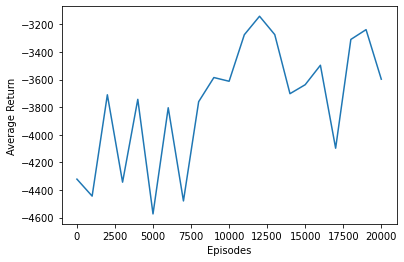

In [10]:
tfdqn.plot_returns(returns, num_iterations, eval_interval)